### 복합 화력발전소 발전량 예측
- Feature
    - AT (temperature) : 온도
    - V (Exhaust Vacuum) : 배기진공
    - AP (Ambient Pressure) : 주위압력
    - RH (Relative Humidity) : 상대습도
- Target
    - PE (net hourly eletrical energy output) : 시간당 전기 에너지 출력

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### V(배기진공) feature를 이용해서 PE(전기에너지출력)을 예측하는 모델 만들기
- 1. 선형회귀
- 2. 다항회귀

In [3]:
df = pd.read_csv("./data/thermal_power_plant.csv")

In [4]:
feateure = df[["V"]]
target = df.PE

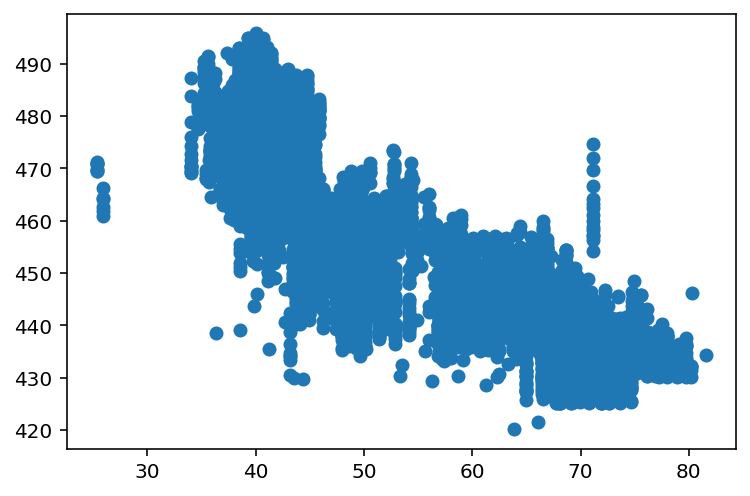

In [5]:
plt.scatter(feateure, target)
plt.show()

In [ ]:
# outlier 제거 : X가 30이하 데이터 제거

In [6]:
df = df[df["V"] > 30]
feateure, target = df[["V"]], df.PE

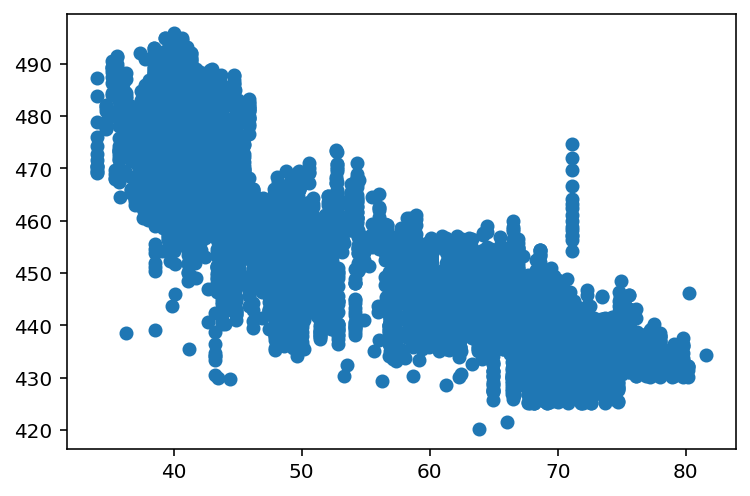

In [7]:
plt.scatter(feateure, target)
plt.show()

In [8]:
remove_df = df[(df["V"] > 70) & (df["PE"] > 450)]
remove_df.index
df = df.drop(index=remove_df.index)

In [9]:
feateure, target = df[["V"]], df.PE

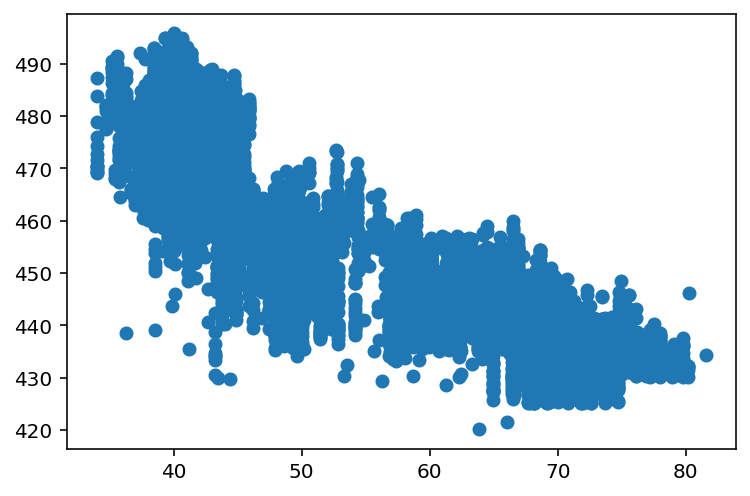

In [10]:
plt.scatter(feateure, target)
plt.show()

In [11]:
# 데이터셋 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x, test_x, train_y, test_y = train_test_split(feateure, target, test_size=0.3, random_state=0)

##### 1. 선형회귀

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# 모델 학습
model = LinearRegression().fit(train_x, train_y)

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
# 모델 평가
pred_y = model.predict(test_x)
mean_absolute_error(test_y, pred_y)

6.520821217376543

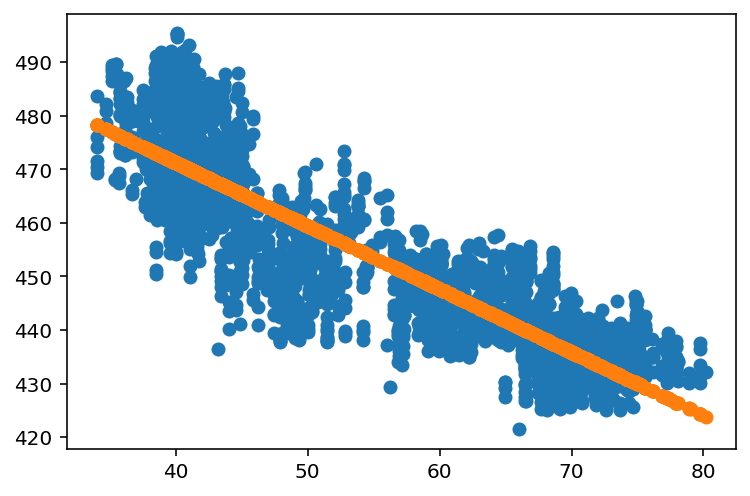

In [20]:
# 시각화
plt.scatter(test_x, test_y)
plt.scatter(test_x, model.predict(test_x))
plt.show()

##### 2. 다항회귀

- train_x 데이터를 다항식으로 변경

In [21]:
# feature값 행렬 데이터로 변경
from sklearn.preprocessing import PolynomialFeatures

In [22]:
# 모델의 학습은 선형대수로 계산이 되기 때문에 제곱한 feature를 추가
poly_features = PolynomialFeatures(degree=2, include_bias=False)
train_x_poly = poly_features.fit_transform(train_x)

In [ ]:
np.c_[feateure.values[0], feateure.values[0]**2], train_x_poly[0]

In [23]:
# 모델 학습
model = LinearRegression().fit(train_x_poly, train_y)

In [24]:
# 모델 평가
test_x_poly = poly_features.fit_transform(test_x)
pred_y = model.predict(test_x_poly)
mean_absolute_error(test_y, pred_y)

6.16783179276813

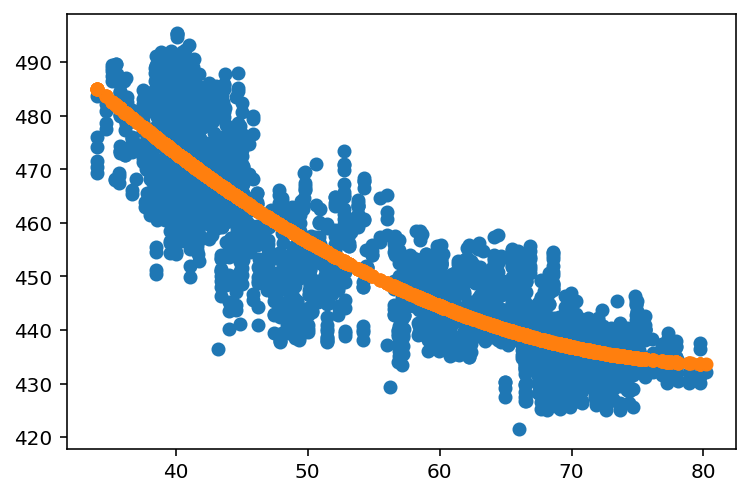

In [25]:
# 시각화
plt.scatter(test_x, test_y)
plt.scatter(test_x, model.predict(test_x_poly))
plt.show()

In [26]:
# 최적화 차원값 찾기
def model_mae(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    train_x_poly = poly_features.fit_transform(train_x)
    model = LinearRegression().fit(train_x_poly, train_y)
    test_x_poly = poly_features.fit_transform(test_x)
    pred_y = model.predict(test_x_poly)
    return model, mean_absolute_error(test_y, pred_y), poly_features

In [27]:
# 1차원에서 10차원까지 학습
evaluation_df = pd.DataFrame(columns=["degree", "mae"])
for degree in range(1, 11):
    model, mae, _ = model_mae(degree)
    evaluation_df.loc[len(evaluation_df)] = [degree, mae]
evaluation_df

,degree,mae
0,1.0,6.520821
1,2.0,6.167832
2,3.0,6.162473
3,4.0,6.164944
4,5.0,6.058774
5,6.0,6.017021
6,7.0,6.003411
7,8.0,5.995657
8,9.0,5.997664
9,10.0,6.006342


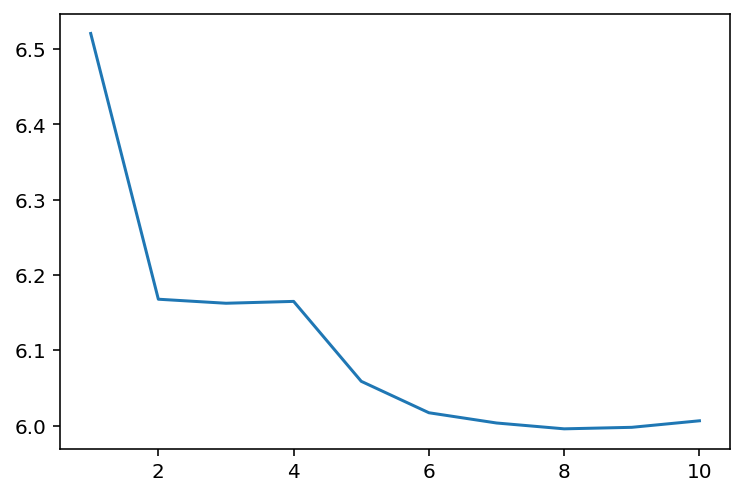

In [28]:
# degree 2나 6이 가장 적당
# 차원이 증가함에 따라 계산량이 많아짐, 계산량이 많아지면 모델성능의 이득도 증가해야 함
# 차원이 증가할수록 모델에 대한 성능의 이득이 가장 많은 차원을 결정
plt.plot(evaluation_df["degree"], evaluation_df["mae"])
plt.show()

In [29]:
# model 생성 및 다차원 feature 데이터 만들어주는 객체 생성
model, mae, poly_features = model_mae(6)
mae

6.017020537642083

In [30]:
# 다차원 feature 데이터로 전처리
test_x_poly = poly_features.fit_transform(test_x)

# 모델에 예측 데이터 적용
pred_y = model.predict(test_x_poly)

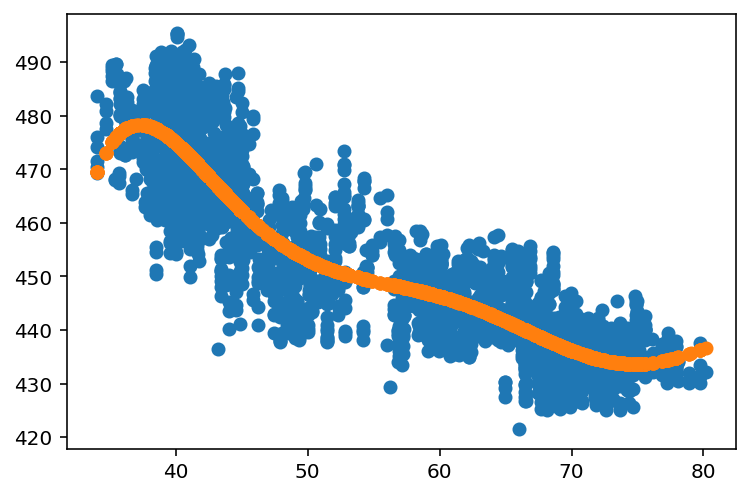

In [31]:
# 시각화
plt.scatter(test_x, test_y)
plt.scatter(test_x, model.predict(test_x_poly))
plt.show()